# Задание 12-14. Классификация

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.datasets import load_digits
from sklearn.metrics import precision_score, recall_score, accuracy_score, multilabel_confusion_matrix, roc_curve, auc

from sklearn.datasets import fetch_20newsgroups
from ucimlrepo import fetch_ucirepo

import pandas as pd
import matplotlib.pyplot as plt

# Задача 1. Классификация изображений рукописных цифр
    • Набор данных: MNIST.
    • Предварительная обработка: масштабирование пикселей, разделение данных на обучение и тестирование.
    • Модели: логистическая регрессия, SVM, случайный лес, градиентный бустинг, нейронные сети.
    • Сравнение модели: точность, матрица ошибок, ROC-кривые.
    • Изучение и подбор гиперпараметров: GridSearchCV или RandomizedSearchCV.
    • Визуализация: отображение изображений, важности признаков или активаций нейронной сети.

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
X, y = digits.data, digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier()]

In [ ]:
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(model)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    print(f'Матрица ошибок:\n {multilabel_confusion_matrix(y_test, y_pred)}')

    if isinstance(model, LogisticRegression):
                param = {
                        'max_iter' : [100, 200],
                        'C' : [0.01, 0.05, 0.1, 1],
                }
    elif isinstance(model, SVC):
        param = {
                'C': [0.01, 0.1, 1],
            }
    elif isinstance(model, RandomForestClassifier):
        param = {'n_estimators': [50, 100, 150]}
    elif isinstance(model, GradientBoostingClassifier):
        param = {'learning_rate': [0.01, 0.1, 0.5]}
    elif isinstance(model, MLPClassifier):
        param = {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh'],
                'learning_rate_init': [0.01, 0.1],
                'alpha': [0.01, 0.1]
            }

    grid_search = GridSearchCV(estimator = model, param_grid=param, scoring = 'accuracy', cv = 5, verbose=0)

    grid_search.fit(X_train, y_train)

    print('Лучшие параметры GridSearchCV: ', grid_search.best_params_)
    print('Лучший результат для GridSearchCV: ', grid_search.best_score_)
    print('\n\n')


LogisticRegression()
Accuracy: 0.9722222222222222
Матрица ошибок:
 [[[327   0]
  [  0  33]]

 [[331   1]
  [  0  28]]

 [[327   0]
  [  0  33]]

 [[325   1]
  [  1  33]]

 [[314   0]
  [  1  45]]

 [[310   3]
  [  3  44]]

 [[324   1]
  [  1  34]]

 [[326   0]
  [  1  33]]

 [[329   1]
  [  1  29]]

 [[317   3]
  [  2  38]]]
Лучшие параметры GridSearchCV:  {'C': 1, 'max_iter': 100}
Лучший результат для GridSearchCV:  0.9617136082075106



SVC()
Accuracy: 0.9805555555555555
Матрица ошибок:
 [[[327   0]
  [  0  33]]

 [[332   0]
  [  0  28]]

 [[327   0]
  [  0  33]]

 [[326   0]
  [  1  33]]

 [[312   2]
  [  0  46]]

 [[311   2]
  [  1  46]]

 [[324   1]
  [  0  35]]

 [[326   0]
  [  2  32]]

 [[329   1]
  [  1  29]]

 [[319   1]
  [  2  38]]]
Лучшие параметры GridSearchCV:  {'C': 1}
Лучший результат для GridSearchCV:  0.9763380758807589



RandomForestClassifier()
Accuracy: 0.975
Матрица ошибок:
 [[[327   0]
  [  1  32]]

 [[331   1]
  [  0  28]]

 [[327   0]
  [  0  33]]

 [[326   0

# Задача 2. Определение мошенничества с кредитными картами
    • Набор данных: Credit Card Fraud Detection dataset на Kaggle.
    • Предварительная обработка: масштабирование, обработка несбалансированных данных.
    • Модели: логистическая регрессия, SVM, случайный лес, градиентный бустинг, нейронные сети.
    • Сравнение моделей: точность, полнота, ROC-кривые.
    • Изучение и подбор гиперпараметров: GridSearchCV или RandomizedSearchCV.
    • Визуализация: важности признаков, ROC-кривые.

In [ ]:
credit = pd.read_csv('data/creditcard.zip')

credit = credit.sample(5000)

credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261865,160217.0,-0.228510,1.361116,1.701139,4.309578,0.375999,1.577252,-0.036991,0.221504,-1.403495,...,0.347634,1.113112,-0.170703,0.454213,-0.692020,0.445925,-0.004084,0.215906,18.87,0
206875,136415.0,2.019562,0.031465,-1.626936,0.356279,0.279544,-0.691393,0.007092,-0.035544,0.396733,...,-0.314375,-0.892028,0.365088,0.638084,-0.352080,0.146535,-0.073687,-0.041349,0.99,0
165472,117451.0,-0.070222,0.608569,-0.218188,-0.634549,1.542360,0.774267,1.044476,0.186435,-0.551245,...,0.287479,1.035016,-0.019128,-1.268560,-0.381536,0.449232,0.060390,0.013868,29.00,0
16802,28174.0,-0.410471,1.611297,0.384071,2.821935,-0.081520,0.065655,1.619964,-1.554912,-1.356152,...,0.866584,0.482267,0.185617,0.418731,-1.062979,0.030323,-0.125507,-0.041948,156.74,0
63613,50801.0,1.252648,0.273800,-0.176510,0.246580,0.504315,0.407176,-0.071616,0.117255,-0.255954,...,-0.277002,-0.761487,-0.006506,-1.170424,0.292501,0.176759,-0.007438,0.006909,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268831,163402.0,0.309445,-0.154803,0.506564,-1.958505,-0.200893,-0.203742,-0.016888,0.163345,-0.957102,...,-0.159451,-0.689214,0.316111,0.607498,-0.811735,-0.795314,0.016527,0.002199,19.95,0
258917,158877.0,-1.452245,-0.200329,-0.551542,-1.022190,2.875738,-2.022647,0.970844,-0.171476,-0.484130,...,0.184980,0.079774,-0.222953,0.535467,0.746802,0.521154,-0.087945,0.134269,22.79,0
279275,168752.0,1.860246,-1.344622,-0.555519,-0.467469,-1.182045,-0.148119,-0.932051,0.009363,-0.233746,...,-0.080507,0.062198,0.101056,-0.388729,-0.484567,0.644291,-0.037605,-0.035413,135.00,0
136315,81644.0,0.756839,-1.514746,-0.156240,-0.259559,-1.316646,-0.763678,0.030565,-0.196468,-0.989177,...,-0.207915,-0.762554,-0.252165,0.589389,0.237528,1.031448,-0.135308,0.041530,312.80,0


In [ ]:
credit['Class'].value_counts()

Class
0    4991
1       9
Name: count, dtype: int64

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 261865 to 222637
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5000 non-null   float64
 1   V1      5000 non-null   float64
 2   V2      5000 non-null   float64
 3   V3      5000 non-null   float64
 4   V4      5000 non-null   float64
 5   V5      5000 non-null   float64
 6   V6      5000 non-null   float64
 7   V7      5000 non-null   float64
 8   V8      5000 non-null   float64
 9   V9      5000 non-null   float64
 10  V10     5000 non-null   float64
 11  V11     5000 non-null   float64
 12  V12     5000 non-null   float64
 13  V13     5000 non-null   float64
 14  V14     5000 non-null   float64
 15  V15     5000 non-null   float64
 16  V16     5000 non-null   float64
 17  V17     5000 non-null   float64
 18  V18     5000 non-null   float64
 19  V19     5000 non-null   float64
 20  V20     5000 non-null   float64
 21  V21     5000 non-null   float64
 22

In [ ]:
X, y = credit.iloc[:, 1:29], credit.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier()]

LogisticRegression()
Accuracy: 1.0
Матрица ошибок:
 [[[  1   0]
  [  0 999]]

 [[999   0]
  [  0   1]]]


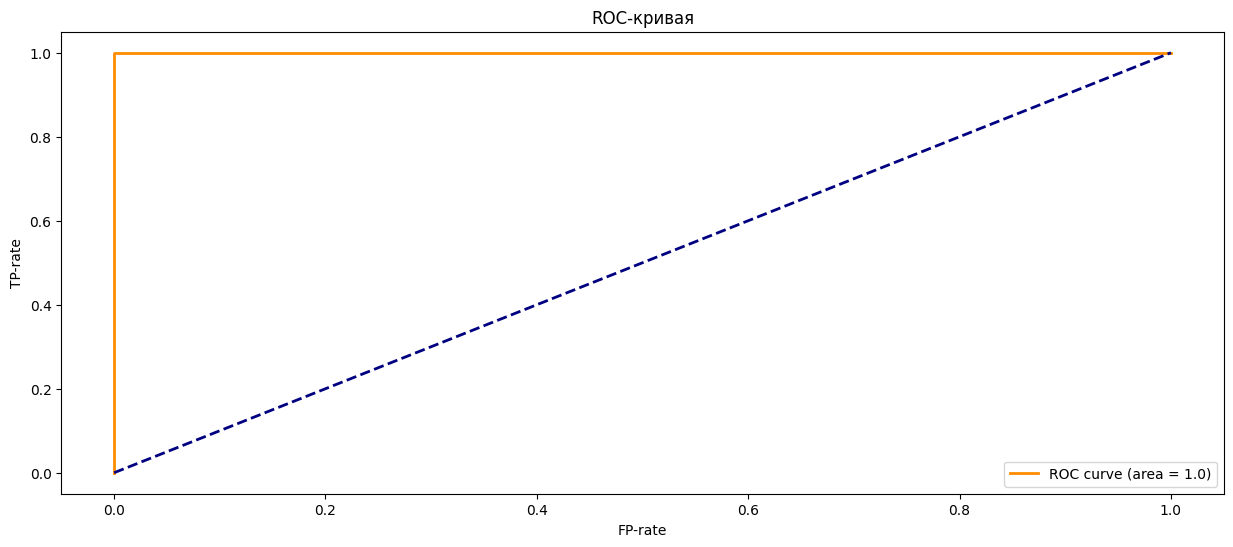

Лучшие параметры GridSearchCV:  {'C': 0.05, 'max_iter': 100}
Лучший результат для GridSearchCV:  0.9984999999999999



SVC()
Accuracy: 0.999
Матрица ошибок:
 [[[  0   1]
  [  0 999]]

 [[999   0]
  [  1   0]]]


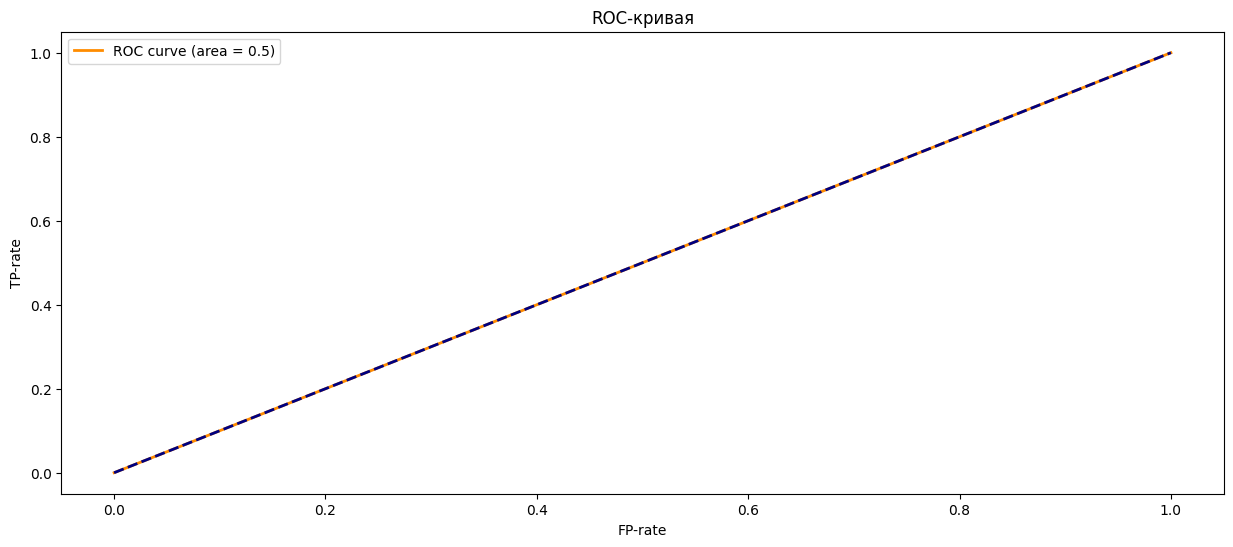

Лучшие параметры GridSearchCV:  {'C': 0.01}
Лучший результат для GridSearchCV:  0.998



RandomForestClassifier()
Accuracy: 1.0
Матрица ошибок:
 [[[  1   0]
  [  0 999]]

 [[999   0]
  [  0   1]]]


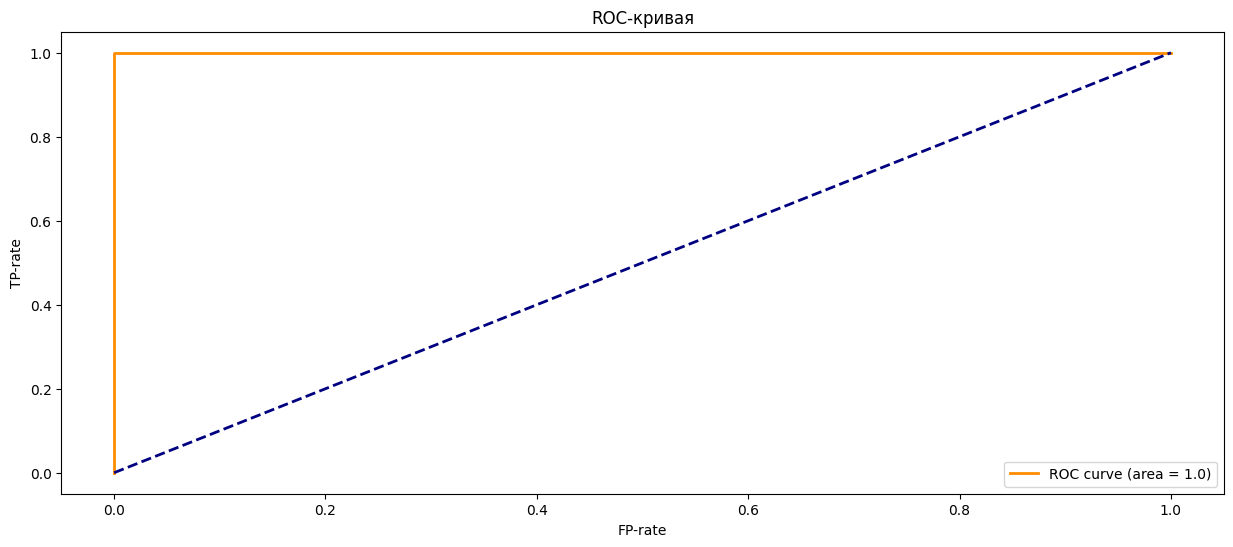

Feature Importance:
0: 0.006392964541513943
1: 0.006651222775356622
2: 0.012753096627913074
3: 0.01806439515665255
4: 0.005190388315604987
5: 0.018610980235101666
6: 0.03716415345610392
7: 0.007153052869025883
8: 0.02089776402278458
9: 0.1289147840890707
10: 0.08170746283053593
11: 0.08968907332404878
12: 0.009166479456152204
13: 0.17264732585169543
14: 0.01681237204970802
15: 0.0546464242505878
16: 0.2052455338278687
17: 0.017917763171254167
18: 0.010168025627658563
19: 0.011885284931990068
20: 0.007506282856421438
21: 0.0037847361170660634
22: 0.009254236787741368
23: 0.007662392240470096
24: 0.006077125241568886
25: 0.013186424736180907
26: 0.010458984566179495
27: 0.010391270043744145


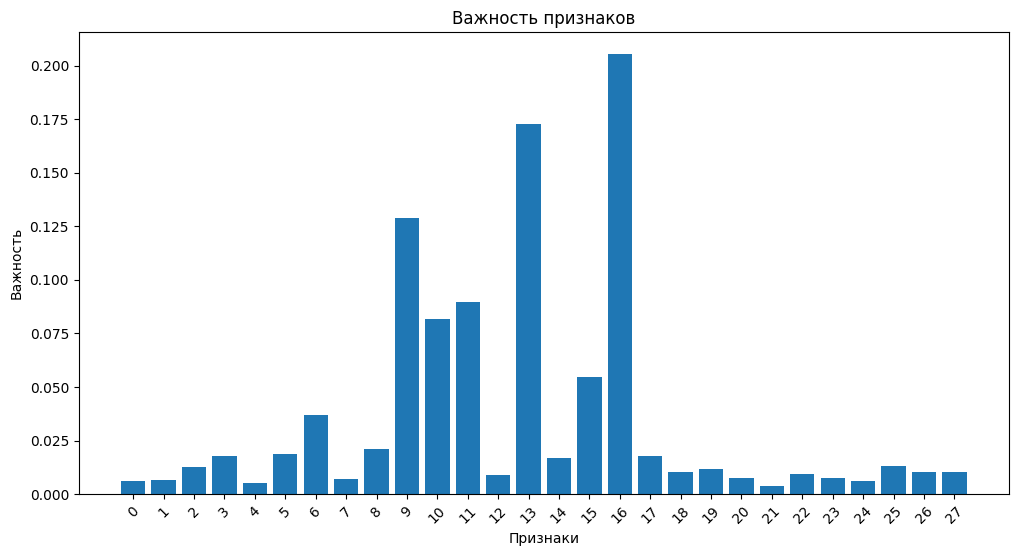

Лучшие параметры GridSearchCV:  {'n_estimators': 50}
Лучший результат для GridSearchCV:  0.99875



GradientBoostingClassifier()
Accuracy: 1.0
Матрица ошибок:
 [[[  1   0]
  [  0 999]]

 [[999   0]
  [  0   1]]]


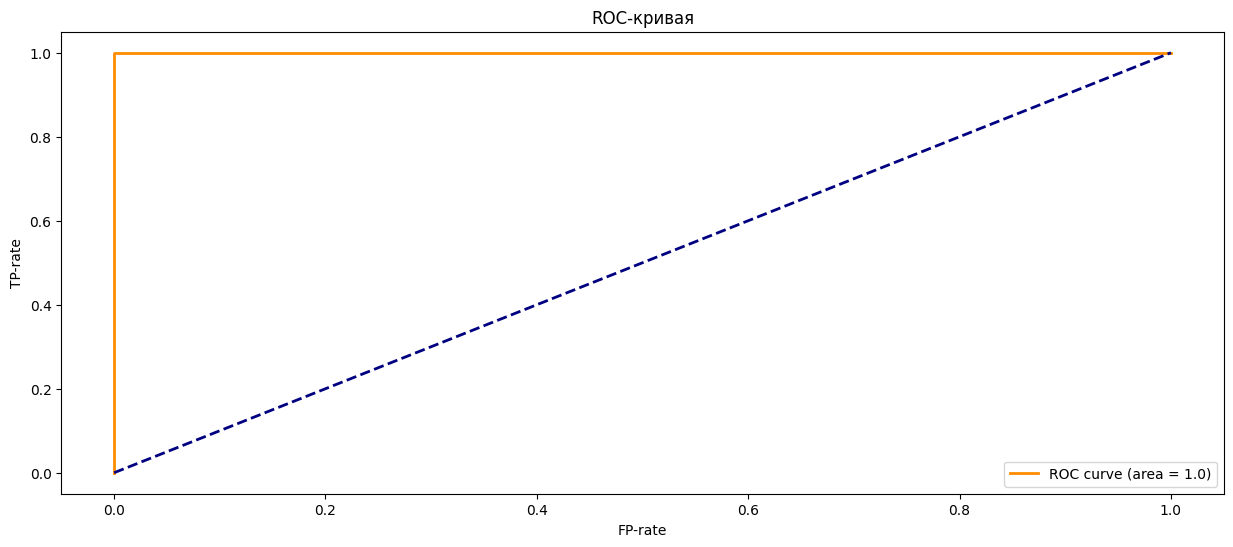

Feature Importance:
0: 2.0776942256453127e-08
1: 8.320144964651997e-12
2: 8.244643721739927e-08
3: 0.0
4: 6.769506915326801e-08
5: 1.1725543506043595e-07
6: 0.0
7: 0.0
8: 0.0
9: 0.0
10: 3.031357619447477e-08
11: 0.0
12: 2.488428249489048e-10
13: 0.0
14: 2.8282640619089077e-07
15: 0.0
16: 0.7995991983988656
17: 1.7926267818961065e-08
18: 2.4038277583770398e-08
19: 1.453797912512173e-06
20: 0.0
21: 0.08349900886652226
22: 8.553553439617033e-10
23: 1.3156502374817857e-07
24: 4.5756750167924285e-10
25: 0.11689851874439883
26: 1.0040348897378658e-07
27: 9.433752904891389e-07


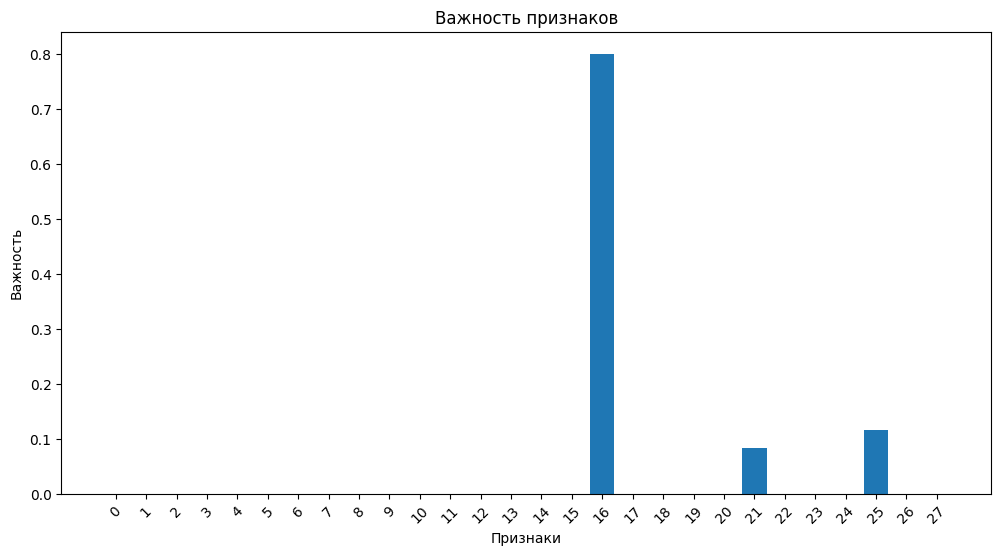

Лучшие параметры GridSearchCV:  {'learning_rate': 0.5}
Лучший результат для GridSearchCV:  0.9984999999999999



MLPClassifier()
Accuracy: 1.0
Матрица ошибок:
 [[[  1   0]
  [  0 999]]

 [[999   0]
  [  0   1]]]


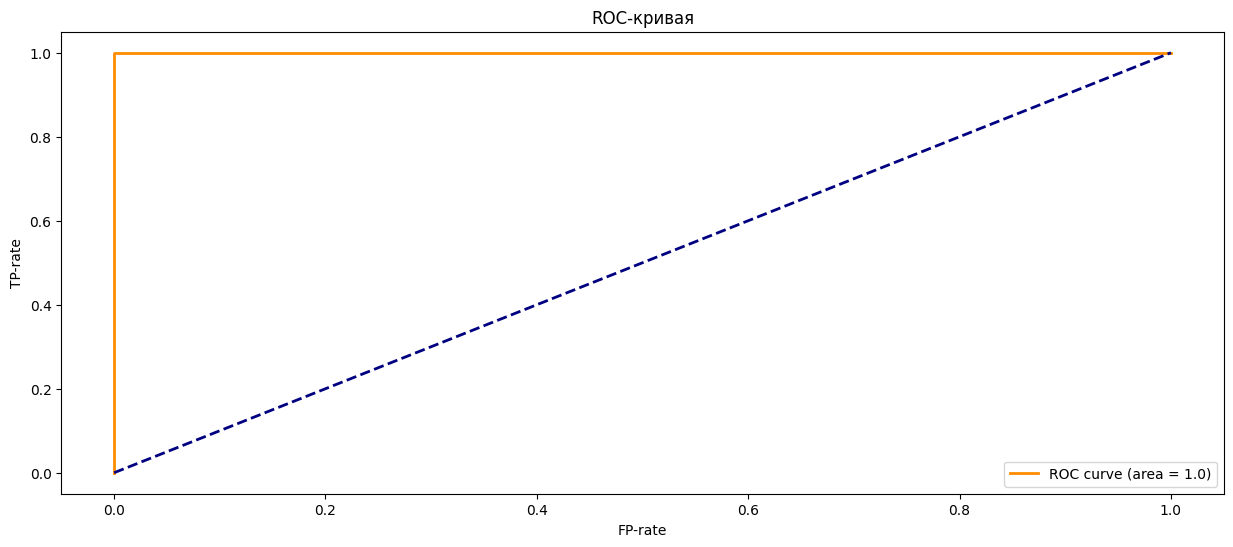

Лучшие параметры GridSearchCV:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
Лучший результат для GridSearchCV:  0.99975





In [ ]:
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(model)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    print(f'Матрица ошибок:\n {multilabel_confusion_matrix(y_test, y_pred)}')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc =auc(fpr,tpr)

    plt.figure(figsize=(15, 6))
    plt.title('ROC-кривая')

    lw = 2

    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('FP-rate')
    plt.ylabel('TP-rate')
    plt.legend()
    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        print('Feature Importance:')
        for i, importance in enumerate(feature_importance):
            print(f'{pd.DataFrame(X_train).columns[i]}: {importance}')

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.xticks(range(len(pd.DataFrame(X_train).columns)), pd.DataFrame(X_train).columns, rotation=45)
        plt.xlabel('Признаки')
        plt.ylabel('Важность')
        plt.title('Важность признаков')
        plt.show()

    if isinstance(model, LogisticRegression):
                param = {
                        'max_iter' : [100, 200],
                        'C' : [0.01, 0.05, 0.1, 1],
                }
    elif isinstance(model, SVC):
        param = {
                'C': [0.01, 0.1, 1],
            }
    elif isinstance(model, RandomForestClassifier):
        param = {'n_estimators': [50, 100, 150]}
    elif isinstance(model, GradientBoostingClassifier):
        param = {'learning_rate': [0.01, 0.1, 0.5]}
    elif isinstance(model, MLPClassifier):
        param = {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh'],
                'learning_rate_init': [0.01, 0.1],
                'alpha': [0.01, 0.1]
            }

    grid_search = GridSearchCV(estimator = model, param_grid=param, scoring = 'accuracy', cv = 5, verbose=0)

    grid_search.fit(X_train, y_train)

    print('Лучшие параметры GridSearchCV: ', grid_search.best_params_)
    print('Лучший результат для GridSearchCV: ', grid_search.best_score_)
    print('\n\n')


# Задача 3. Классификация рака молочной железы
    • Набор данных: Breast Cancer Wisconsin (Diagnostic).
    • Предварительная обработка: масштабирование, разделение данных на обучающие и тестовые.
    • Модели: логистическая регрессия, SVM, решающие деревья, случайный лес, градиентный бустинг.
    • Сравнение моделей: точность, матрица ошибок, ROC-кривые.
    • Изучение и подбор гиперпараметров: GridSearchCV или RandomizedSearchCV.
    • Визуализация: важности признаков, корреляционная матрица.

In [ ]:
cancer = pd.read_csv('data/cancer.zip')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer = cancer.iloc[:, :-1]

In [ ]:
X, y = cancer.drop(columns='diagnosis'), cancer['diagnosis'].map({'B': 0, 'M': 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

LogisticRegression()
Accuracy: 0.9736842105263158
Матрица ошибок:
 [[[41  2]
  [ 1 70]]

 [[70  1]
  [ 2 41]]]


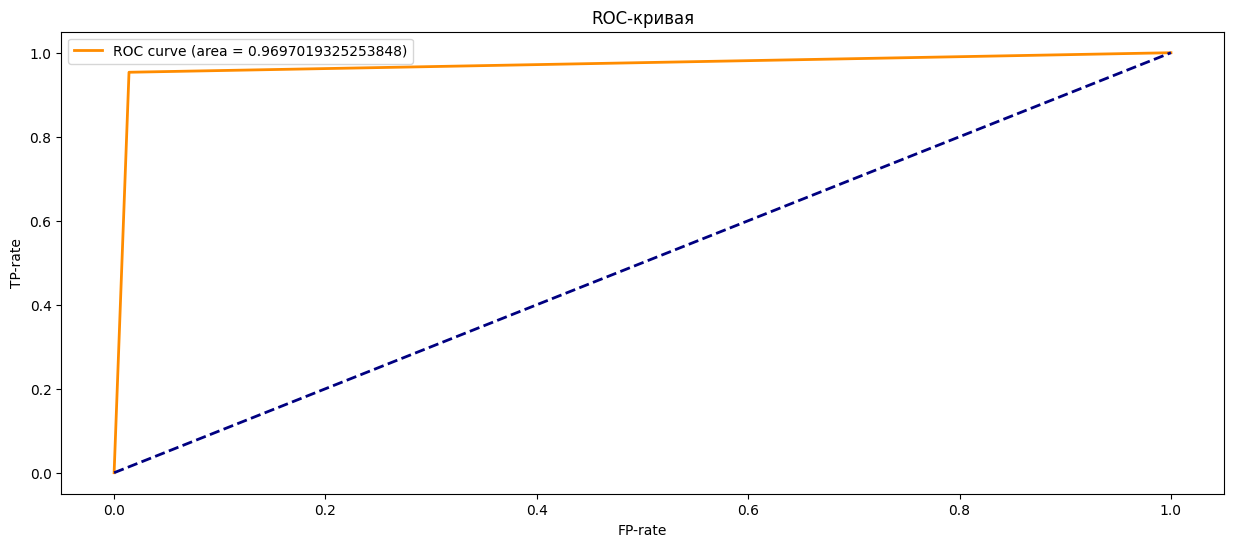

Лучшие параметры GridSearchCV:  {'C': 0.1, 'max_iter': 100}
Лучший результат для GridSearchCV:  0.9736263736263737



SVC()
Accuracy: 0.9824561403508771
Матрица ошибок:
 [[[41  2]
  [ 0 71]]

 [[71  0]
  [ 2 41]]]


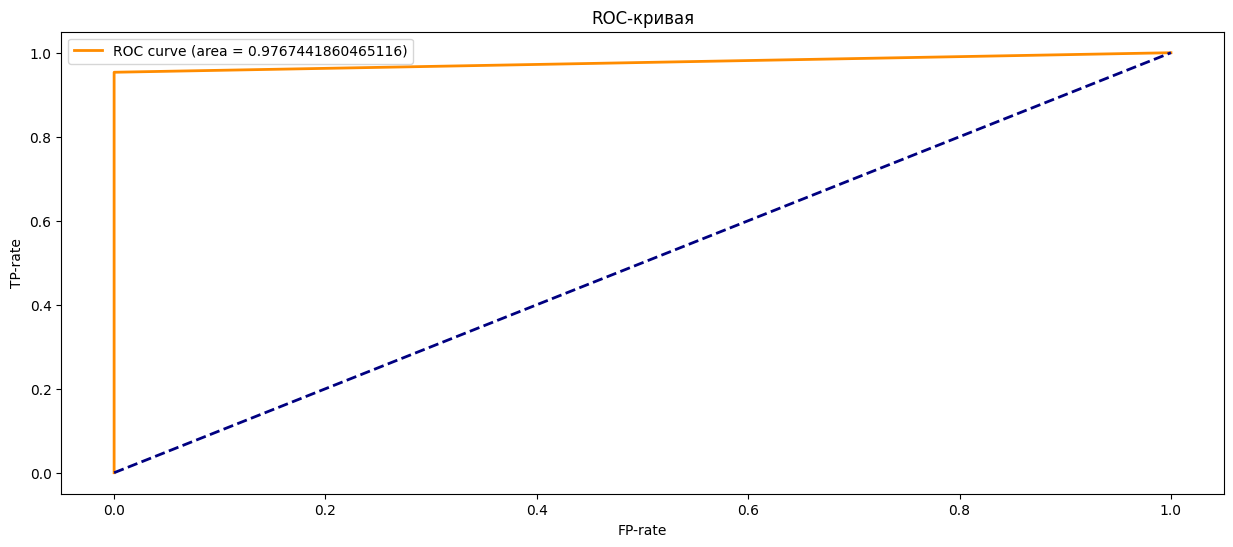

Лучшие параметры GridSearchCV:  {'C': 1}
Лучший результат для GridSearchCV:  0.9736263736263737



RandomForestClassifier()
Accuracy: 0.956140350877193
Матрица ошибок:
 [[[40  3]
  [ 2 69]]

 [[69  2]
  [ 3 40]]]


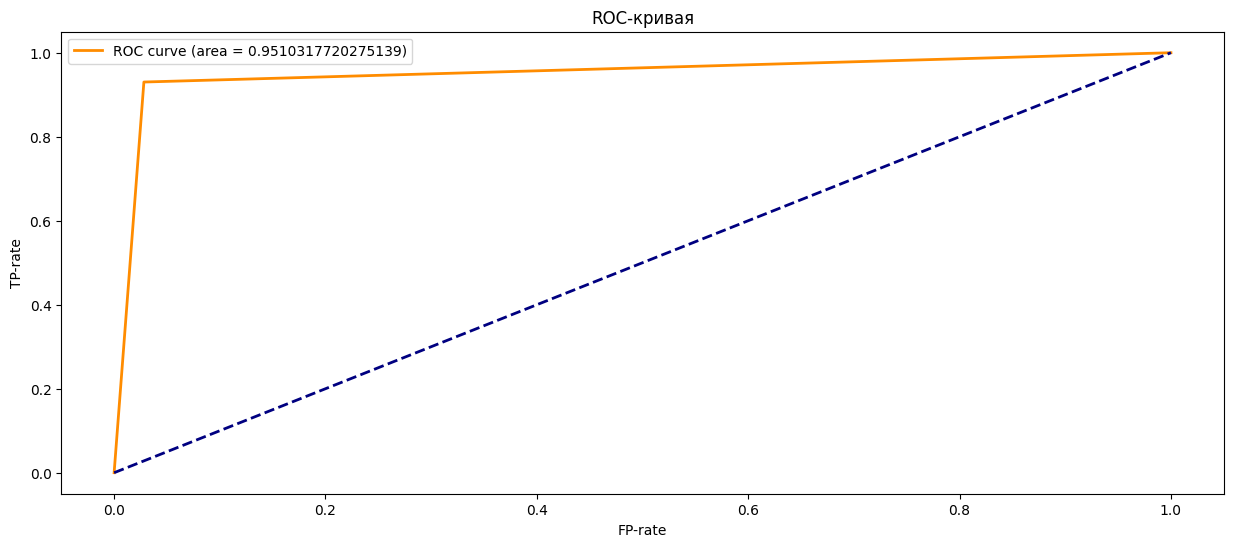

Feature Importance:
0: 0.006227099960702886
1: 0.028313811280170555
2: 0.021946454994866735
3: 0.03441679222001371
4: 0.04383099400659112
5: 0.004224338502353804
6: 0.013581987337863055
7: 0.04880271276158575
8: 0.11426427057906671
9: 0.004631411717964759
10: 0.005414285504389962
11: 0.01400156034785629
12: 0.004466672092670043
13: 0.014266553565076032
14: 0.01760199687009426
15: 0.004524955385050055
16: 0.005400849077176722
17: 0.004841517789708786
18: 0.00367454344071282
19: 0.0058437790164696515
20: 0.003932449178726604
21: 0.147985111613854
22: 0.01842051927595451
23: 0.11646562589395032
24: 0.11327549138504722
25: 0.01571260820348561
26: 0.009486252807281336
27: 0.025281989226431566
28: 0.12952799976417415
29: 0.012324597280566773
30: 0.007310768920144078


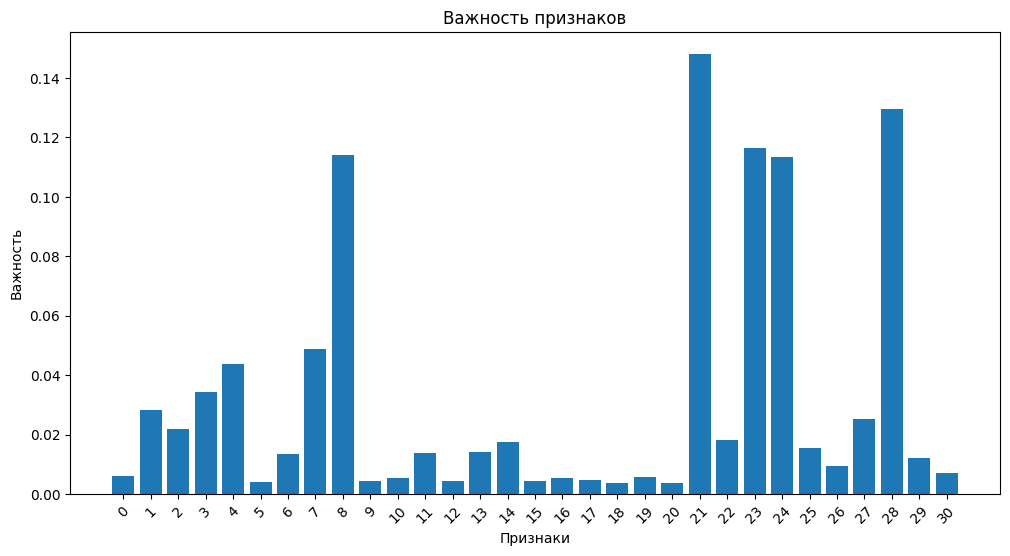

Лучшие параметры GridSearchCV:  {'n_estimators': 50}
Лучший результат для GridSearchCV:  0.9648351648351647



GradientBoostingClassifier()
Accuracy: 0.9473684210526315
Матрица ошибок:
 [[[40  3]
  [ 3 68]]

 [[68  3]
  [ 3 40]]]


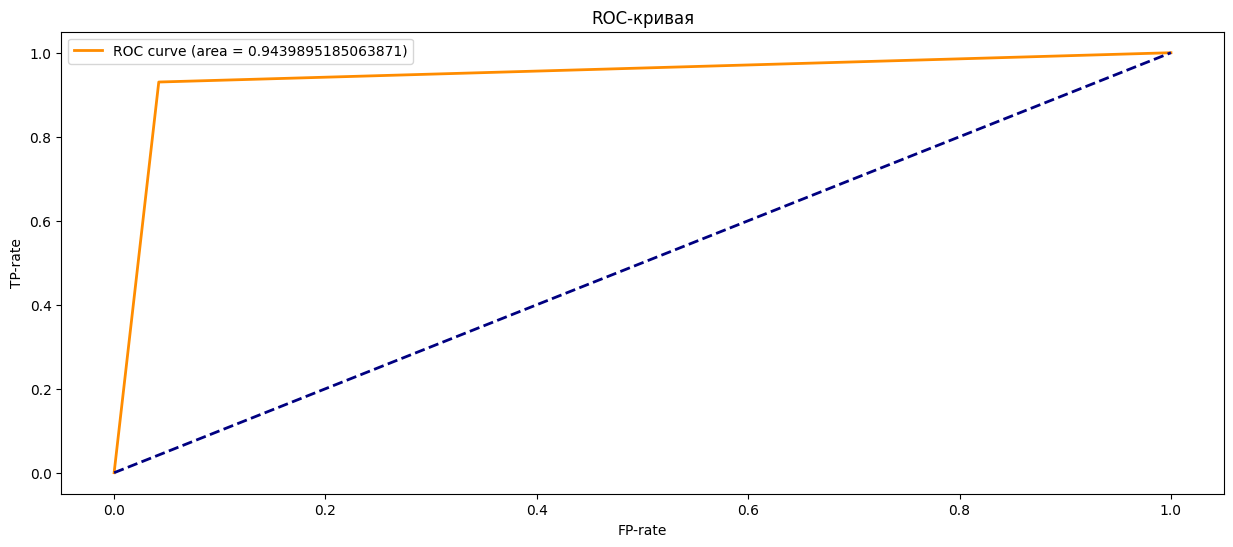

Feature Importance:
0: 0.0026401606327367097
1: 0.0001550622880858802
2: 0.026626285562711224
3: 0.0006089028566988712
4: 0.0006182080180377289
5: 0.002586525513696844
6: 0.0016062156841474015
7: 0.0003998966213609679
8: 0.45078979597633556
9: 0.0008794958791762096
10: 0.0003513509755126594
11: 0.009053719181500797
12: 0.0034517911584956546
13: 0.00015300476629541649
14: 0.005940529398939136
15: 0.0024147459959726475
16: 0.00039042047615707595
17: 0.015017473268338091
18: 0.002003843617265229
19: 0.0009961481330500559
20: 0.0016526277922986278
21: 0.07906242555805403
22: 0.04567759520770155
23: 0.051429154237936335
24: 0.03183084311627001
25: 0.004084896221884371
26: 0.000105181698906761
27: 0.019192334049883707
28: 0.2390971588758553
29: 0.0011754693761260122
30: 8.737860569256431e-06


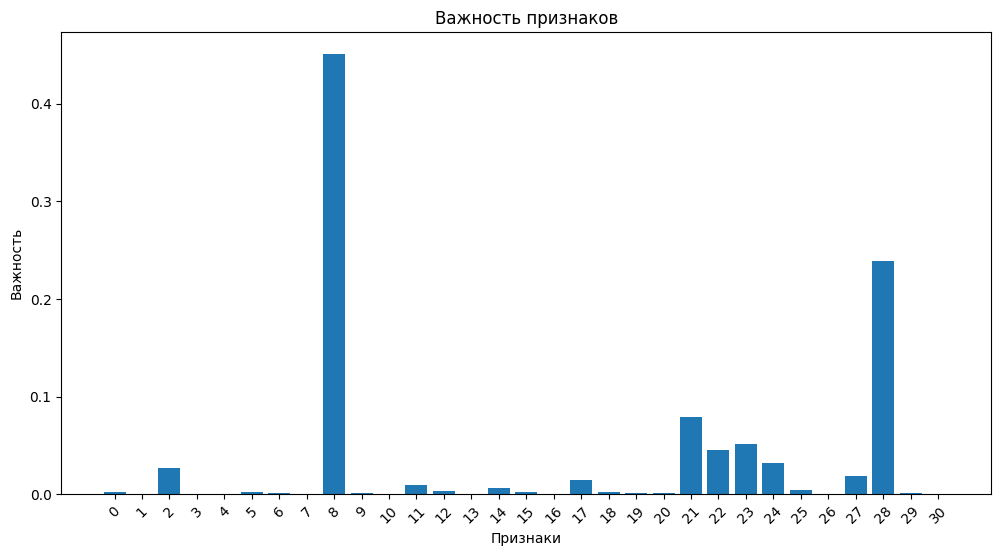

Лучшие параметры GridSearchCV:  {'learning_rate': 0.5}
Лучший результат для GridSearchCV:  0.9670329670329672



DecisionTreeClassifier()
Accuracy: 0.9210526315789473
Матрица ошибок:
 [[[39  4]
  [ 5 66]]

 [[66  5]
  [ 4 39]]]


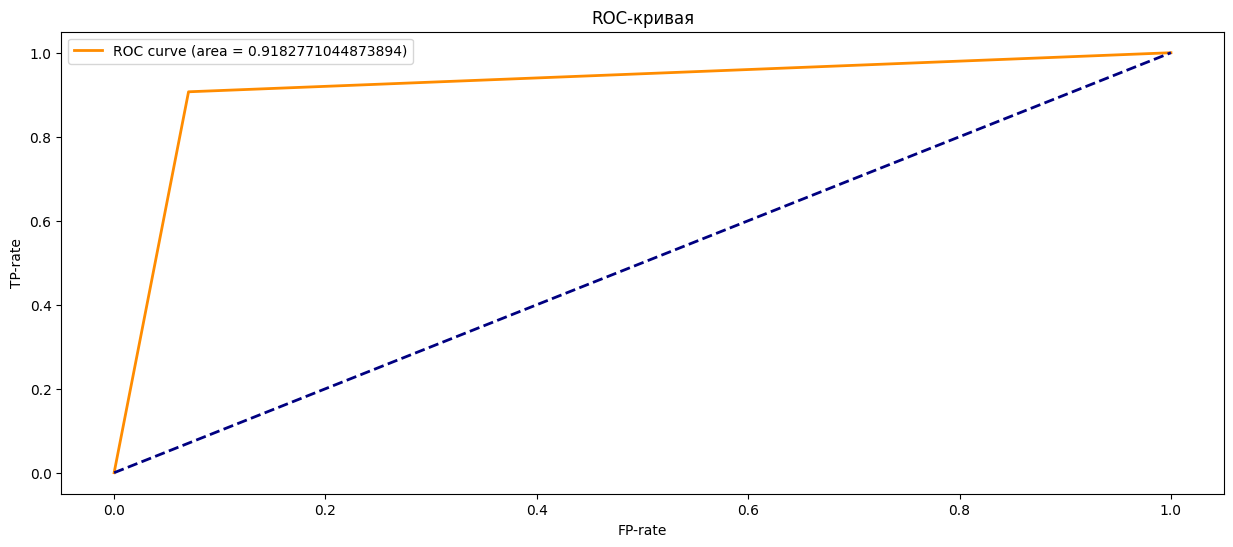

Feature Importance:
0: 0.008786085709162634
1: 0.0
2: 0.0
3: 0.0
4: 0.0
5: 0.0
6: 0.0
7: 0.0062757755065447375
8: 0.6914195549049809
9: 0.0
10: 0.0
11: 0.011982573676838769
12: 0.0
13: 0.0
14: 0.0
15: 0.0012367800829339453
16: 0.0
17: 0.0
18: 0.015930814747382796
19: 0.0
20: 0.018554466715001834
21: 0.05229926933685694
22: 0.06713673827784417
23: 0.051493960584869665
24: 0.0
25: 0.009233190446208121
26: 0.0
27: 0.0
28: 0.06565079001137543
29: 0.0
30: 0.0


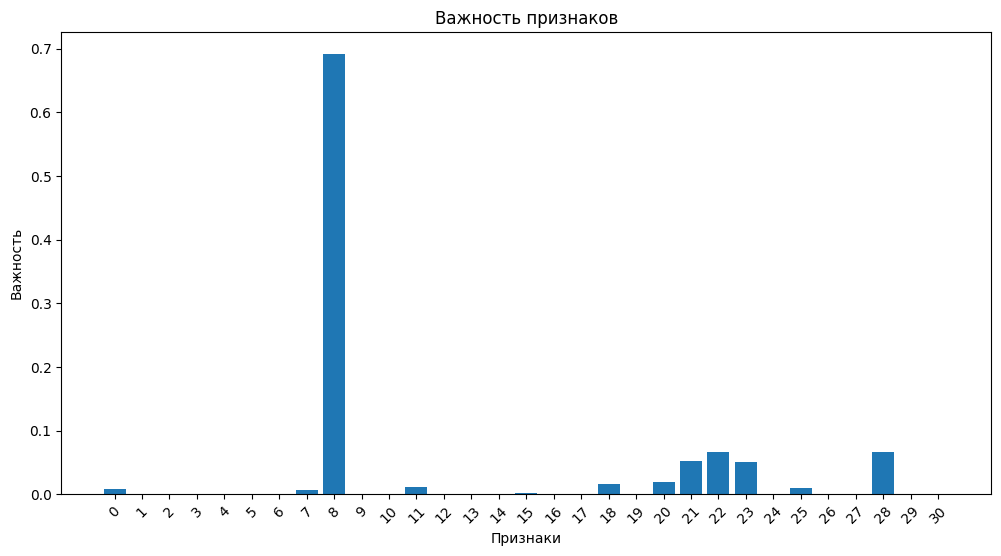

Лучшие параметры GridSearchCV:  {'max_depth': 3}
Лучший результат для GridSearchCV:  0.9274725274725275





In [ ]:
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(model)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    print(f'Матрица ошибок:\n {multilabel_confusion_matrix(y_test, y_pred)}')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc =auc(fpr,tpr)

    plt.figure(figsize=(15, 6))
    plt.title('ROC-кривая')

    lw = 2

    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('FP-rate')
    plt.ylabel('TP-rate')
    plt.legend()
    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        print('Feature Importance:')
        for i, importance in enumerate(feature_importance):
            print(f'{pd.DataFrame(X_train).columns[i]}: {importance}')

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.xticks(range(len(pd.DataFrame(X_train).columns)), pd.DataFrame(X_train).columns, rotation=45)
        plt.xlabel('Признаки')
        plt.ylabel('Важность')
        plt.title('Важность признаков')
        plt.show()

    if isinstance(model, LogisticRegression):
                param = {
                        'max_iter' : [100, 200],
                        'C' : [0.01, 0.05, 0.1, 1],
                }
    elif isinstance(model, SVC):
        param = {
                'C': [0.01, 0.1, 1],
            }
    elif isinstance(model, RandomForestClassifier):
        param = {'n_estimators': [50, 100, 150]}
    elif isinstance(model, GradientBoostingClassifier):
        param = {'learning_rate': [0.01, 0.1, 0.5]}
    elif isinstance(model, DecisionTreeClassifier):
                param = {'max_depth': [2, 3, 5, 10]}

    grid_search = GridSearchCV(estimator = model, param_grid=param, scoring = 'accuracy', cv = 5, verbose=0)

    grid_search.fit(X_train, y_train)

    print('Лучшие параметры GridSearchCV: ', grid_search.best_params_)
    print('Лучший результат для GridSearchCV: ', grid_search.best_score_)
    print('\n\n')


# Задача 4. Спам-фильтрация для текстовых сообщений
    • Набор данных: SMS Spam Collection на Kaggle.
    • Предварительная обработка: векторизация текста, масштабирование, разделение данных на обучающие и тестовые.
    • Модели: логистическая регрессия, SVM, случайный лес, градиентный бустинг.
    • Сравнение моделей: точность, матрица ошибок, ROC-кривые.
    • Изучение и подбор гиперпараметров: GridSearchCV или RandomizedSearchCV.
    • Визуализация: важности признаков.

In [ ]:
sms = pd.read_csv('data/sms.zip', encoding='latin1').dropna(axis=1)
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
sms = sms.rename(columns={'v1': 'target', 'v2': 'message'})
X, y = sms['message'], sms['target'].map({'ham': 0, 'spam': 1})

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]

LogisticRegression()
Accuracy: 0.9632286995515695
Матрица ошибок:
 [[[109  41]
  [  0 965]]

 [[965   0]
  [ 41 109]]]


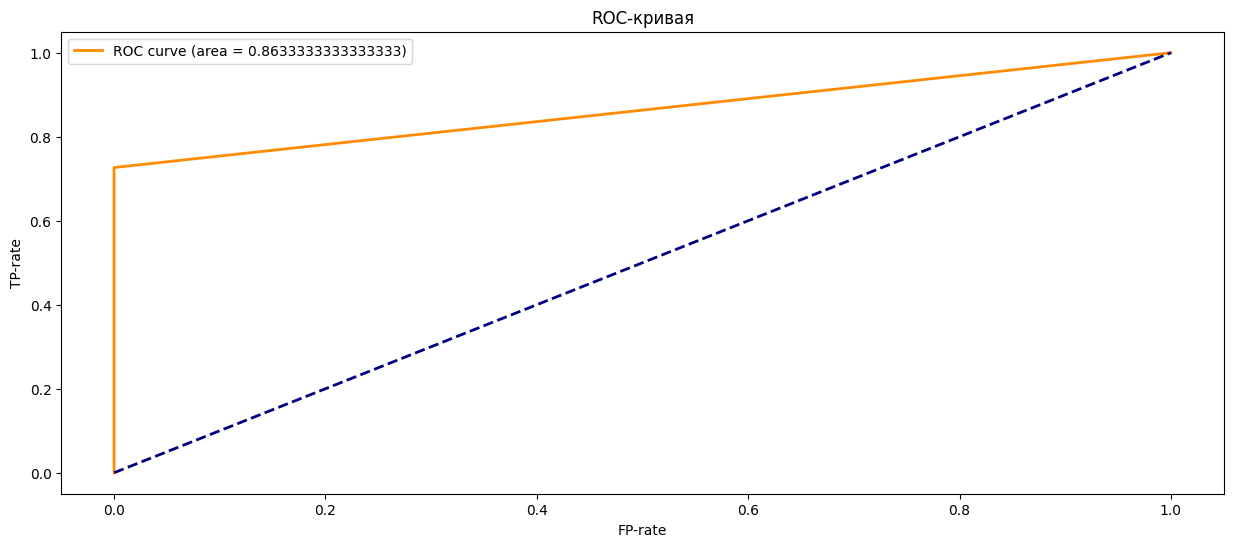

Лучшие параметры GridSearchCV:  {'C': 1, 'max_iter': 100}
Лучший результат для GridSearchCV:  0.9573691574438958



SVC()
Accuracy: 0.9766816143497757
Матрица ошибок:
 [[[124  26]
  [  0 965]]

 [[965   0]
  [ 26 124]]]


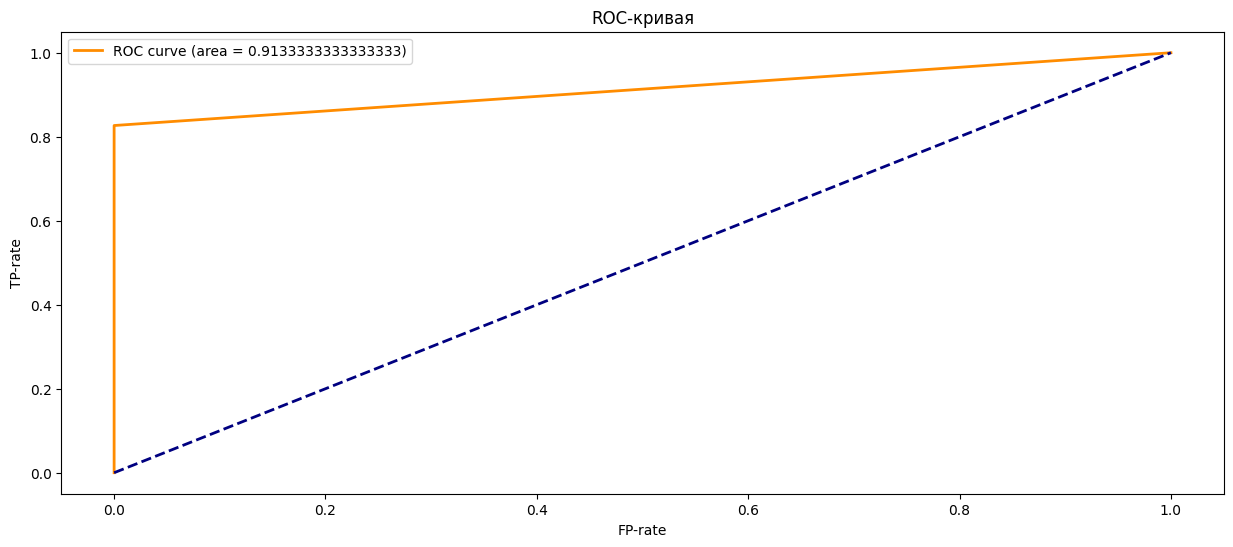

Лучшие параметры GridSearchCV:  {'C': 1}
Лучший результат для GridSearchCV:  0.9744208401906459



RandomForestClassifier()
Accuracy: 0.9739910313901345
Матрица ошибок:
 [[[121  29]
  [  0 965]]

 [[965   0]
  [ 29 121]]]


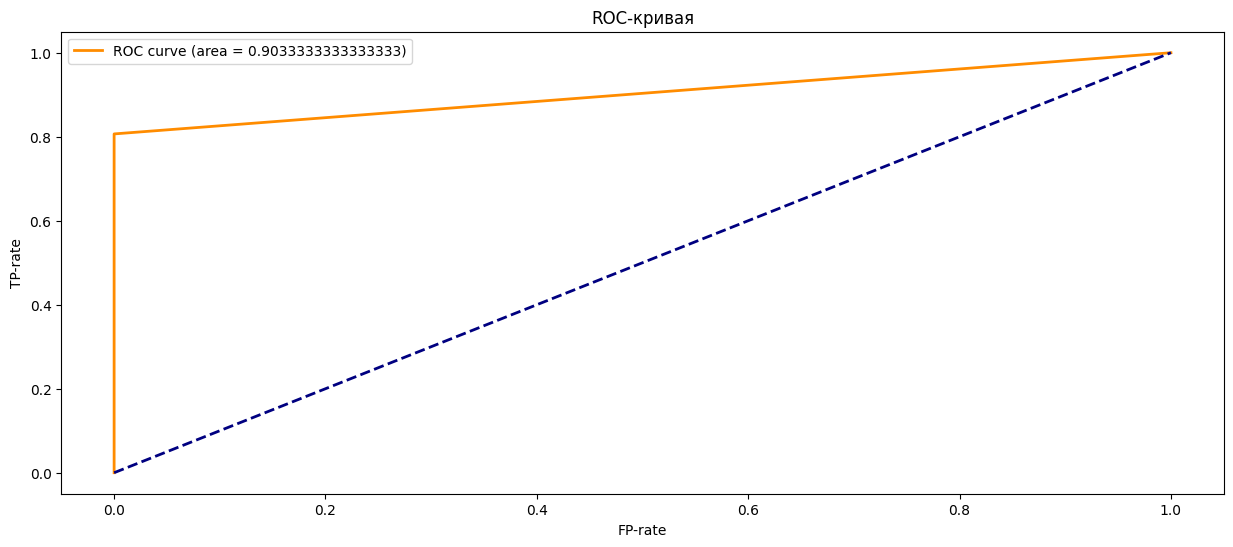

Лучшие параметры GridSearchCV:  {'n_estimators': 150}
Лучший результат для GridSearchCV:  0.9759923600730775



GradientBoostingClassifier()
Accuracy: 0.9730941704035875
Матрица ошибок:
 [[[120  30]
  [  0 965]]

 [[965   0]
  [ 30 120]]]


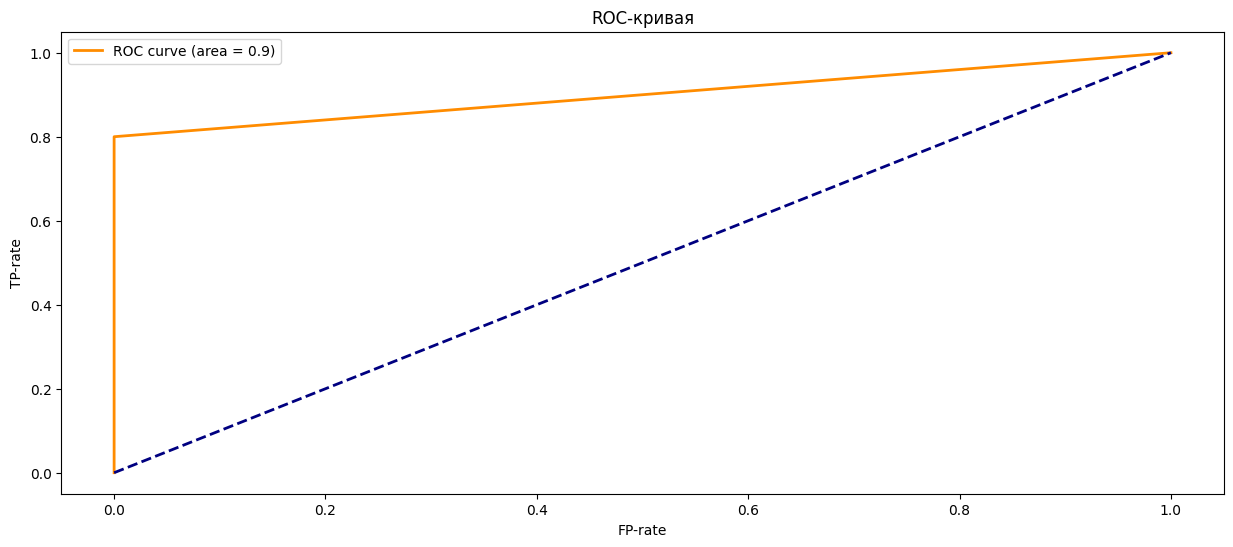

Лучшие параметры GridSearchCV:  {'learning_rate': 0.5}
Лучший результат для GridSearchCV:  0.9753164429547091





In [ ]:
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(model)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    print(f'Матрица ошибок:\n {multilabel_confusion_matrix(y_test, y_pred)}')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc =auc(fpr,tpr)

    plt.figure(figsize=(15, 6))
    plt.title('ROC-кривая')

    lw = 2

    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('FP-rate')
    plt.ylabel('TP-rate')
    plt.legend()
    plt.show()


    if isinstance(model, LogisticRegression):
                param = {
                        'max_iter' : [100, 200],
                        'C' : [0.01, 0.05, 0.1, 1],
                }
    elif isinstance(model, SVC):
        param = {
                'C': [0.01, 0.1, 1],
            }
    elif isinstance(model, RandomForestClassifier):
        param = {'n_estimators': [50, 100, 150]}
    elif isinstance(model, GradientBoostingClassifier):
        param = {'learning_rate': [0.01, 0.1, 0.5]}

    grid_search = GridSearchCV(estimator = model, param_grid=param, scoring = 'accuracy', cv = 5, verbose=0)

    grid_search.fit(X_train, y_train)

    print('Лучшие параметры GridSearchCV: ', grid_search.best_params_)
    print('Лучший результат для GridSearchCV: ', grid_search.best_score_)
    print('\n\n')


# Задача 5. Классификация новостных статей
    • Набор данных: 20 Newsgroups dataset на sklearn.
    • Предварительная обработка: векторизация текста/TF-IDF, масштабирование, разделение данных на обучающие и тестовые.
    • Модели: логистическая регрессия, SVM, случайный лес, градиентный бустинг.
    • Сравнение моделей: точность, матрица ошибок.
    • Изучение и подбор гиперпараметров: GridSearchCV или RandomizedSearchCV.
    • Визуализация: важности признаков.

In [ ]:
news = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
news_dataset = pd.DataFrame(news.data)
news_dataset['target'] = news.target
news_dataset

,0,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4
...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,12
18843,From: westes@netcom.com (Will Estes)\nSubject:...,3
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [ ]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       18846 non-null  object
 1   target  18846 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 294.6+ KB


In [ ]:
news_dataset = news_dataset.sample(3000).reset_index().drop(columns='index')

In [ ]:
X, y = news_dataset[0], news_dataset['target']

X = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]

In [ ]:
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(model)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    print(f'Матрица ошибок:\n {multilabel_confusion_matrix(y_test, y_pred)}')



    if isinstance(model, LogisticRegression):
                param = {
                        'max_iter' : [100, 200],
                        'C' : [0.01, 0.05, 0.1, 1],
                }
    elif isinstance(model, SVC):
        param = {
                'C': [0.01, 0.1, 1],
            }
    elif isinstance(model, RandomForestClassifier):
        param = {'n_estimators': [50, 100, 150]}
    elif isinstance(model, GradientBoostingClassifier):
        param = {'learning_rate': [0.01, 0.1, 0.5]}

    grid_search = GridSearchCV(estimator = model, param_grid=param, scoring = 'accuracy', cv = 5, verbose=0)

    grid_search.fit(X_train, y_train)

    print('Лучшие параметры GridSearchCV: ', grid_search.best_params_)
    print('Лучший результат для GridSearchCV: ', grid_search.best_score_)
    print('\n\n')


LogisticRegression()
Accuracy: 0.7816666666666666
Матрица ошибок:
 [[[558   2]
  [ 10  30]]

 [[553  13]
  [  7  27]]

 [[555   6]
  [  6  33]]

 [[557  18]
  [  5  20]]

 [[566   3]
  [ 11  20]]

 [[573   2]
  [  8  17]]

 [[559  17]
  [  2  22]]

 [[572   2]
  [ 10  16]]

 [[552  13]
  [  3  32]]

 [[555  13]
  [  0  32]]

 [[566   1]
  [  5  28]]

 [[576   0]
  [  3  21]]

 [[559  10]
  [  8  23]]

 [[565   5]
  [  9  21]]

 [[568   6]
  [  4  22]]

 [[551  13]
  [  5  31]]

 [[570   5]
  [  5  20]]

 [[562   1]
  [  4  33]]

 [[576   0]
  [ 10  14]]

 [[576   1]
  [ 16   7]]]
Лучшие параметры GridSearchCV:  {'C': 1, 'max_iter': 100}
Лучший результат для GridSearchCV:  0.7620833333333332



SVC()
Accuracy: 0.7333333333333333
Матрица ошибок:
 [[[558   2]
  [ 12  28]]

 [[550  16]
  [  4  30]]

 [[557   4]
  [ 10  29]]

 [[559  16]
  [  6  19]]

 [[568   1]
  [ 15  16]]

 [[573   2]
  [ 10  15]]

 [[570   6]
  [  3  21]]

 [[572   2]
  [ 11  15]]

 [[558   7]
  [  6  29]]

 [[555  13]

KeyboardInterrupt: 

# Задача 6. Определение типа стекла
    • Набор данных: Glass Identification Dataset на UCI Machine Learning Repository.
    • Предварительная обработка: масштабирование, разделение данных на обучающие и тестовые.
    • Модели: логистическая регрессия, SVM, k-ближайших соседей, случайный лес, градиентный бустинг.
    • Сравнение моделей: точность, матрица ошибок.
    • Изучение и подбор гиперпараметров: GridSearchCV или RandomizedSearchCV.
    • Визуализация: важности признаков, корреляционная матрица.

In [33]:
glass_identification = fetch_ucirepo(id=42)
X = glass_identification.data.features
y = glass_identification.data.targets
glass = pd.DataFrame(data = X, columns = glass_identification.data.feature_names)
glass['target'] = y

glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [37]:
y = glass.target

scaler = StandardScaler()
X = scaler.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [LogisticRegression(max_iter=10000), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]

LogisticRegression(max_iter=10000)
Accuracy: 0.7209302325581395
Матрица ошибок:
 [[[28  4]
  [ 2  9]]

 [[23  6]
  [ 4 10]]

 [[40  0]
  [ 3  0]]

 [[39  0]
  [ 2  2]]

 [[40  0]
  [ 1  2]]

 [[33  2]
  [ 0  8]]]
Лучшие параметры GridSearchCV:  {'C': 0.1}
Лучший результат для GridSearchCV:  0.5905882352941176



SVC()
Accuracy: 0.7209302325581395
Матрица ошибок:
 [[[27  5]
  [ 0 11]]

 [[23  6]
  [ 4 10]]

 [[40  0]
  [ 3  0]]

 [[38  1]
  [ 2  2]]

 [[40  0]
  [ 2  1]]

 [[35  0]
  [ 1  7]]]
Лучшие параметры GridSearchCV:  {'C': 1}
Лучший результат для GridSearchCV:  0.6783193277310925



RandomForestClassifier()
Accuracy: 0.813953488372093
Матрица ошибок:
 [[[27  5]
  [ 0 11]]

 [[27  2]
  [ 5  9]]

 [[40  0]
  [ 1  2]]

 [[39  0]
  [ 2  2]]

 [[40  0]
  [ 0  3]]

 [[34  1]
  [ 0  8]]]
Feature Importance:
0: 0.16147934260394595
1: 0.1041253902312269
2: 0.15931242411534993
3: 0.15944556010514788
4: 0.07891676323329229
5: 0.08964879673971157
6: 0.1305805534543373
7: 0.06781932274008155

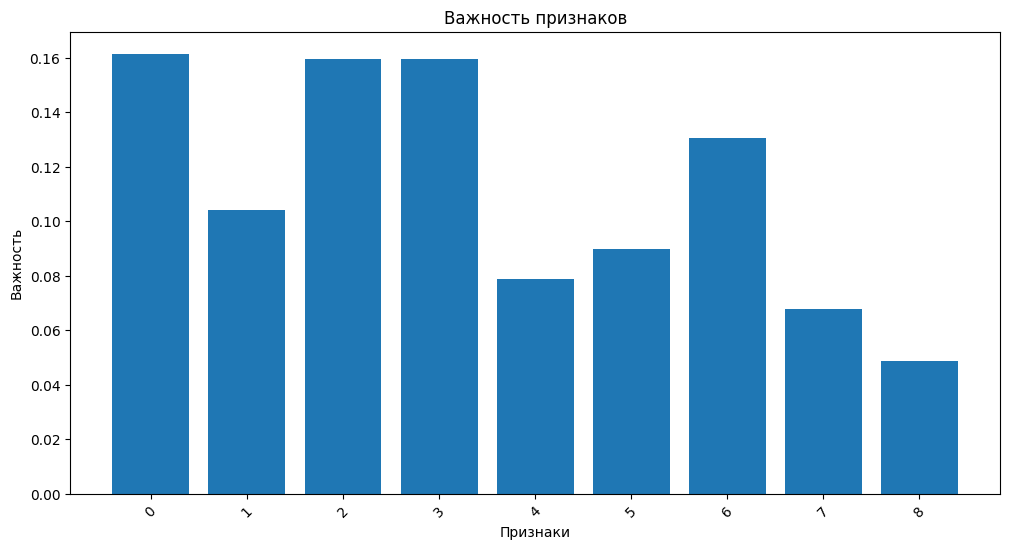

Лучшие параметры GridSearchCV:  {'n_estimators': 150}
Лучший результат для GridSearchCV:  0.7489075630252101



GradientBoostingClassifier()
Accuracy: 0.8604651162790697
Матрица ошибок:
 [[[29  3]
  [ 0 11]]

 [[28  1]
  [ 3 11]]

 [[39  1]
  [ 0  3]]

 [[39  0]
  [ 1  3]]

 [[40  0]
  [ 2  1]]

 [[34  1]
  [ 0  8]]]
Feature Importance:
0: 0.15349009475784722
1: 0.05436515935698968
2: 0.16440667610873924
3: 0.17091277248079523
4: 0.07002686683056648
5: 0.04018483842641862
6: 0.16051254164538195
7: 0.13058315545689222
8: 0.05551789493636923


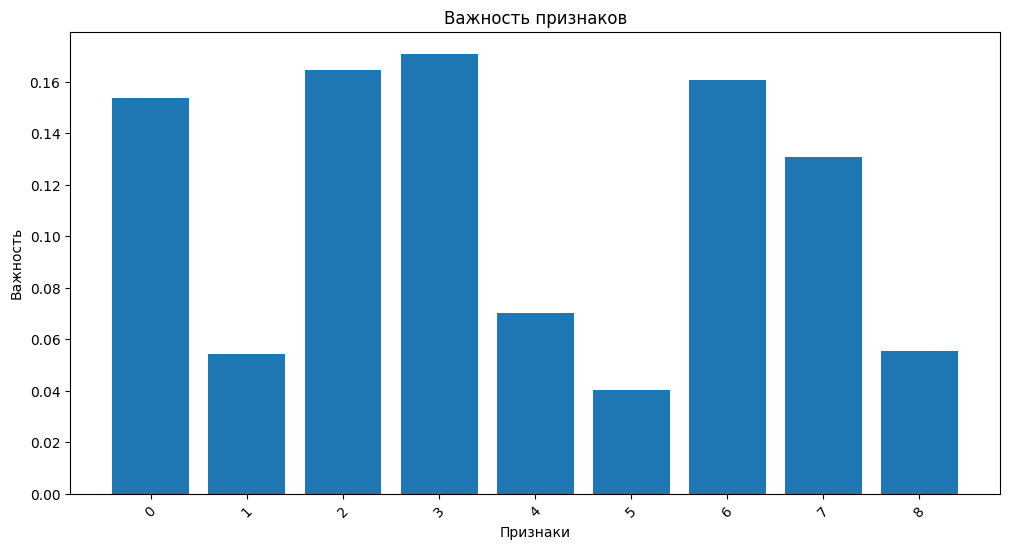

Лучшие параметры GridSearchCV:  {'learning_rate': 0.5}
Лучший результат для GridSearchCV:  0.7139495798319327





In [38]:
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(model)

    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    print(f'Матрица ошибок:\n {multilabel_confusion_matrix(y_test, y_pred)}')

    plt.show()

    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        print('Feature Importance:')
        for i, importance in enumerate(feature_importance):
            print(f'{pd.DataFrame(X_train).columns[i]}: {importance}')

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
        plt.xticks(range(len(pd.DataFrame(X_train).columns)), pd.DataFrame(X_train).columns, rotation=45)
        plt.xlabel('Признаки')
        plt.ylabel('Важность')
        plt.title('Важность признаков')
        plt.show()

    if isinstance(model, LogisticRegression):
                param = {
                        'C' : [0.01, 0.05, 0.1, 1],
                }
    elif isinstance(model, SVC):
        param = {
                'C': [0.01, 0.1, 1],
            }
    elif isinstance(model, RandomForestClassifier):
        param = {'n_estimators': [50, 100, 150]}
    elif isinstance(model, GradientBoostingClassifier):
        param = {'learning_rate': [0.01, 0.1, 0.5]}
    elif isinstance(model, MLPClassifier):
        param = {
                'hidden_layer_sizes': [(50,), (100,)],
                'activation': ['relu', 'tanh'],
                'learning_rate_init': [0.01, 0.1],
                'alpha': [0.01, 0.1]
            }

    grid_search = GridSearchCV(estimator = model, param_grid=param, scoring = 'accuracy', cv = 5, verbose=0)

    grid_search.fit(X_train, y_train)

    print('Лучшие параметры GridSearchCV: ', grid_search.best_params_)
    print('Лучший результат для GridSearchCV: ', grid_search.best_score_)
    print('\n\n')
